# Include Libraries

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, validation_curve,\
ShuffleSplit, learning_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, \
HashingVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics  import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
import itertools

# Import Data

In [0]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['fake_or_real_news.csv']))

data.shape

Saving fake_or_real_news.csv to fake_or_real_news (1).csv


(6335, 4)

In [0]:
y = data.label
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.33,random_state=53)

In [0]:
X_train

2576                                                     
1539    Report Copyright Violation Do you think there ...
5163    The election in 232 photos, 43 numbers and 131...
2615    Email Ever wonder what’s on the mind of today’...
4270    Wells Fargo is Rotting from the Top Down Wells...
                              ...                        
662     —Debby Borza stood before a wall of photos of ...
3261    Presumptive Republican nominee Donald Trump ha...
5883    December's job growth numbers are in, and they...
2933    In a wide-ranging discussion, Trump also said ...
797     Top officials of the Cruz campaign are convinc...
Name: text, Length: 4244, dtype: object

In [0]:
print('Columns: ', data.columns)

Columns:  Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [0]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
X_test

4221    Donald Trump threatened to sue the New York Ti...
1685    Planned Parenthood: Abortion pill usage now ri...
3348    In a last dash, final "hail mary" attempt to e...
2633    Washington (CNN) Donald Trump and Ben Carson n...
975     The Obama administration announced Friday it w...
                              ...                        
3888    In a marketing fiasco that could rank right up...
2015    Email \nThe Politico/Morning Consult Poll find...
5860    The Maryland Democrat made the announcement Mo...
3071    Prev post Page 1 of 4 Next \nWhen most people ...
4284    The Bushes are burning as they consume the new...
Name: text, Length: 2091, dtype: object

In [0]:
y_train

2576    FAKE
1539    FAKE
5163    REAL
2615    FAKE
4270    FAKE
        ... 
662     REAL
3261    REAL
5883    REAL
2933    REAL
797     REAL
Name: label, Length: 4244, dtype: object

In [0]:
y_test

4221    REAL
1685    FAKE
3348    REAL
2633    REAL
975     REAL
        ... 
3888    REAL
2015    FAKE
5860    REAL
3071    FAKE
4284    REAL
Name: label, Length: 2091, dtype: object

# CountVectorizer Method

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["Few black taxis drive up major roads on quiet hazy nights"]
# create the transform
c_vectorizer = CountVectorizer()
# tokenize and build vocab
c_vectorizer.fit(text)
# summarize
print(c_vectorizer.vocabulary_)
# encode document
c_vector = c_vectorizer.transform(text)
# summarize encoded vector
print(c_vector.shape)
#print(type(c_vector))
print(c_vector.toarray())

{'few': 2, 'black': 0, 'taxis': 9, 'drive': 1, 'up': 10, 'major': 4, 'roads': 8, 'on': 6, 'quiet': 7, 'hazy': 3, 'nights': 5}
(1, 11)
[[1 1 1 1 1 1 1 1 1 1 1]]


In [0]:
# encode another document
text2 = ["black taxis"]
c2_vector = c_vectorizer.transform(text2)
print(c2_vector.toarray())

[[1 0 0 0 0 0 0 0 0 1 0]]


In [0]:
corpus = [
"the house had a tiny little mouse",
"the cat saw the mouse",
"the mouse ran away from the house",
"the cat finally ate the mouse",
"the end of the mouse story"
]
c2_vectorizer = CountVectorizer()
X = c2_vectorizer.fit_transform(corpus)
print(c2_vectorizer.get_feature_names())
print(X.toarray())  

['ate', 'away', 'cat', 'end', 'finally', 'from', 'had', 'house', 'little', 'mouse', 'of', 'ran', 'saw', 'story', 'the', 'tiny']
[[0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 0 1 0 0 1 0 2 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0 0 2 0]
 [1 0 1 0 1 0 0 0 0 1 0 0 0 0 2 0]
 [0 0 0 1 0 0 0 0 0 1 1 0 0 1 2 0]]


# Implementing CountVectorizer 

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Word Frequency calculator
def word_frequency_cal(data):
    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    words = {}
    for line in data:
        tokens = tokenizer.tokenize(line)
        for token in tokens:
            if token in words:
                count = words[token] + 1
                words[token] = count
            else:
                words[token] =  1
                
    return words

In [0]:
# Dictionary of all words from train corpus with their counts.
words_counts = word_frequency_cal(X_train)

In [0]:
DICT_SIZE = 5000
WORDS_TO_INDEX = {b[0]:a for a,b in enumerate(sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:5000])}
INDEX_TO_WORDS = {b:a for a,b in WORDS_TO_INDEX.items()}
ALL_WORDS = WORDS_TO_INDEX.keys()

In [0]:
def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
      # create a zero vector equaling the size of words list
    result_vector = np.zeros(dict_size)
    for word in set(text.split()):
        if word in words_to_index:
            result_vector[words_to_index[word]] = 1
            
    return result_vector

In [0]:
from scipy import sparse as sp_sparse
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])

# TfidfVectorizer Method

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# list of text documents
text = ["Few black taxis drive up major roads on quiet hazy nights","black taxis", "major roads"]

# create the transform
t_vectorizer = TfidfVectorizer()

# tokenize and build vocab
t_vectorizer.fit(text)

# summarize
print("Vocabulary :- ",t_vectorizer.vocabulary_)
print("IDF :- ",t_vectorizer.idf_)

# encode document
t_vector = t_vectorizer.transform([text[0]])

# summarize encoded vector
print("Text : ", text[0])
print("Shape : ",t_vector.shape)

print("Representation : ", t_vector.toarray())

Vocabulary :-  {'few': 2, 'black': 0, 'taxis': 9, 'drive': 1, 'up': 10, 'major': 4, 'roads': 8, 'on': 6, 'quiet': 7, 'hazy': 3, 'nights': 5}
IDF :-  [1.28768207 1.69314718 1.69314718 1.69314718 1.28768207 1.69314718
 1.69314718 1.69314718 1.28768207 1.28768207 1.69314718]
Text :  Few black taxis drive up major roads on quiet hazy nights
Shape :  (1, 11)
Representation :  [[0.24920411 0.32767345 0.32767345 0.32767345 0.24920411 0.32767345
  0.32767345 0.32767345 0.24920411 0.24920411 0.32767345]]


 # Implementing TfidfVectorizer

In [0]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

print(tfidf_test)

  (0, 56196)	0.043317993781946
  (0, 56091)	0.032700334892684514
  (0, 55858)	0.05420932672571138
  (0, 55358)	0.059873902121258926
  (0, 55027)	0.048465128413932454
  (0, 54772)	0.06742854646276102
  (0, 54647)	0.03727533728426692
  (0, 54484)	0.1271579409566499
  (0, 54400)	0.05200707680397371
  (0, 54182)	0.17039563890103226
  (0, 52193)	0.050614987002584974
  (0, 52166)	0.09946716362549408
  (0, 52164)	0.07141989873688631
  (0, 51896)	0.09946458588236584
  (0, 51083)	0.06988430196901438
  (0, 50973)	0.11421142130023298
  (0, 50920)	0.08108261495679815
  (0, 50712)	0.07153047197062776
  (0, 50690)	0.05024667107829908
  (0, 50627)	0.04286648720912277
  (0, 48965)	0.06202757667895662
  (0, 48929)	0.17556869825083593
  (0, 46631)	0.14220349264725846
  (0, 46621)	0.10706347107534141
  (0, 44522)	0.040932482324428275
  :	:
  (2090, 5969)	0.03303772830203347
  (2090, 5576)	0.04943418930560652
  (2090, 5530)	0.05752451982231977
  (2090, 4919)	0.026792001261175008
  (2090, 4321)	0.038896002

# Confusion Matrix 

In [0]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Classification using Count Vectorizers Word Vectors

accuracy:   0.893
[[ 865  143]
 [  80 1003]]
Confusion matrix, without normalization


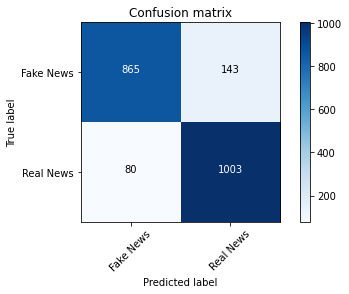

In [0]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)
plot_confusion_matrix(cm, classes=['Fake News', 'Real News'])

# Classification using TF-IDF Word Vectors

accuracy:   0.857
[[ 739  269]
 [  31 1052]]
Confusion matrix, without normalization


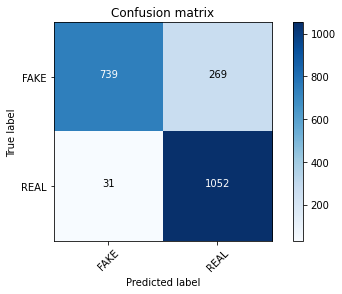

In [0]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Implementing Web Scraping to fetch news from World Wide Web

In [0]:
import requests
from bs4 import BeautifulSoup


url = 'https://www.dailymail.co.uk/news/article-2415189/The-quick-brown-fox-jumps-lazy-dog-Saying-comes-true-camera.html'
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')

soup

news_containers = soup.find_all('title')

remove_words =['<title>','</title>']

str2 = str(news_containers)

remove_words =['<title>','</title>']

for tag in remove_words:
    if tag in str2:

        str2 = str2.replace(tag,"")

news_text = str2
news_text


'[The quick brown fox jumps over the lazy dog! Saying comes true in front of camera | Daily Mail Online]'

# Implementing HashingVectorizer with fetched news

In [0]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = [news_text]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.24253563  0.          0.24253563  0.
   0.         -0.24253563  0.48507125  0.          0.24253563  0.24253563
   0.         -0.24253563  0.         -0.24253563  0.24253563  0.48507125
  -0.24253563  0.        ]]


# Implementing HashingVectorizer on dataset

In [0]:
from sklearn.feature_extraction.text import HashingVectorizer
# Initialize the hashing vectorizer
hashing_vectorizer = HashingVectorizer(stop_words='english', n_features=5000, alternate_sign=False)
# decode_error = 'ignore'

# Fit and transform the training data 
hashing_train = hashing_vectorizer.fit_transform(X_train)

# Transform the test set 
hashing_test = hashing_vectorizer.transform(X_test)

print(hashing_test)

  (0, 112)	0.07930515857181442
  (0, 246)	0.07930515857181442
  (0, 258)	0.07930515857181442
  (0, 341)	0.15861031714362883
  (0, 345)	0.07930515857181442
  (0, 410)	0.07930515857181442
  (0, 418)	0.07930515857181442
  (0, 552)	0.07930515857181442
  (0, 572)	0.07930515857181442
  (0, 576)	0.07930515857181442
  (0, 695)	0.15861031714362883
  (0, 726)	0.07930515857181442
  (0, 806)	0.07930515857181442
  (0, 815)	0.07930515857181442
  (0, 945)	0.15861031714362883
  (0, 1064)	0.07930515857181442
  (0, 1084)	0.07930515857181442
  (0, 1088)	0.31722063428725766
  (0, 1213)	0.07930515857181442
  (0, 1219)	0.07930515857181442
  (0, 1232)	0.07930515857181442
  (0, 1254)	0.07930515857181442
  (0, 1307)	0.15861031714362883
  (0, 1341)	0.07930515857181442
  (0, 1387)	0.15861031714362883
  :	:
  (2090, 4503)	0.02854813347699592
  (2090, 4547)	0.02854813347699592
  (2090, 4565)	0.02854813347699592
  (2090, 4567)	0.02854813347699592
  (2090, 4571)	0.02854813347699592
  (2090, 4574)	0.02854813347699592

# Classification using Hashing Word Vectors

accuracy:   0.869
[[866 142]
 [131 952]]
Confusion matrix, without normalization


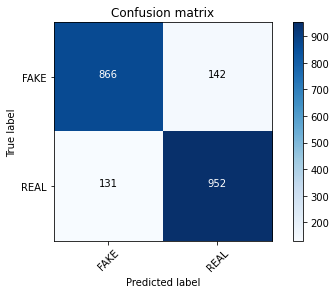

In [0]:
clf = MultinomialNB() 
clf.fit(hashing_train, y_train)
pred = clf.predict(hashing_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Bag of Words Approach

In [0]:
# Word Frequency calculator
def word_frequency(data):
    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    words = {}
    for line in data:
        tokens = tokenizer.tokenize(line)
        for token in tokens:
            if token in words:
                count = words[token] + 1
                words[token] = count
            else:
                words[token] =  1
                
    return words

In [0]:
words_counts = word_frequency(X_train)

In [0]:
DICT_SIZE = 5000
WORDS_TO_INDEX = {b[0]:a for a,b in enumerate(sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:5000])}
INDEX_TO_WORDS = {b:a for a,b in WORDS_TO_INDEX.items()}
ALL_WORDS = WORDS_TO_INDEX.keys()

In [0]:
def my_bag_of_words(text, words_to_index, dict_size):

      # create a zero vector equaling the size of words list
    result_vector = np.zeros(dict_size)
    for word in set(text.split()):
        if word in words_to_index:
            result_vector[words_to_index[word]] = 1
            
    return result_vector

In [0]:
from scipy import sparse as sp_sparse

In [0]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (4244, 5000)
X_test shape  (2091, 5000)


In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [0]:
# Navie Bayes classifier on BOW data
classifier_bow = MultinomialNB()

In [0]:
classifier_bow.fit(X_train_mybag, y_train)
prediction_bow = classifier_bow.predict(X_test_mybag)

In [0]:
cm_bow = metrics.confusion_matrix(y_test, prediction_bow)

In [0]:
prediction_bow = classifier_bow.predict(X_test_mybag)

In [0]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

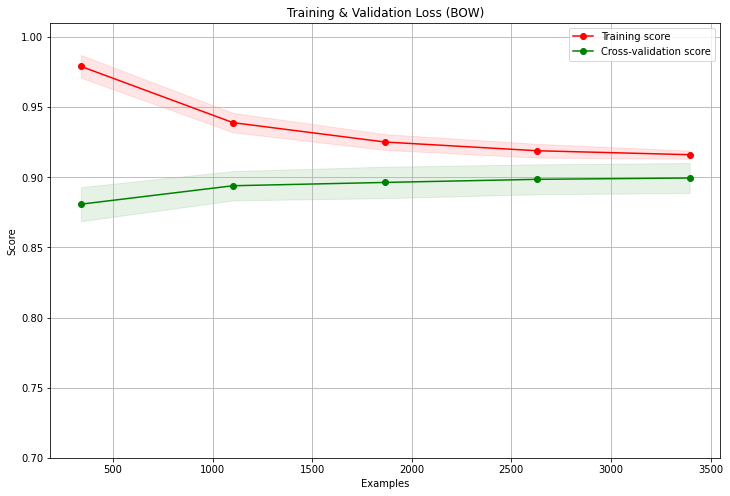

In [0]:
plot_learning_curve(classifier_bow, 
                    "Training & Validation Loss (BOW)", 
                    X_train_mybag, 
                    y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

In [0]:
score_bow = metrics.accuracy_score(y_test, prediction_bow)
print('Accuracy Score: ', score_bow)

Accuracy Score:  0.9019607843137255


Confusion matrix, without normalization


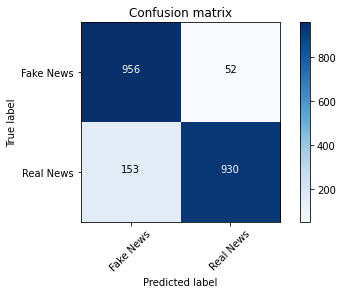

In [0]:
cm_bow = metrics.confusion_matrix(y_test, prediction_bow)
plot_confusion_matrix(cm_bow, classes=['Fake News','Real News'])